In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import torch
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="../VisualBanana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like:


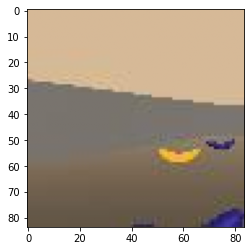

States have shape: (1, 84, 84, 3)


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.visual_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
env.close()

Score: 0.0


In [5]:
state.shape[0]

1

In [6]:
state = np.moveaxis(state, -1, 1)

In [7]:
state.shape

(1, 3, 84, 84)

In [8]:
state = np.vstack((state,state,state,state))

In [9]:
state.shape

(4, 3, 84, 84)

In [10]:
state = np.array([state])

In [11]:
state.shape

(1, 4, 3, 84, 84)

In [20]:
from torchsummary import summary
from agent import Agent

env_info = env.reset(train_mode=False)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.visual_observations[0]
state = np.moveaxis(state, -1, 1)
stacked_state = np.array([np.vstack((state,state,state,state))]) ## I will be stacking 4 frames together to make a video of last 3 frames plus a move ! Double DQN Implementation
stacked_state = np.moveaxis(stacked_state, 2, 1)
state_size = stacked_state.shape

agent = Agent(state_size = state_size, action_size = action_size, seed = 0)
print(agent.qnetwork_local)

QNetwork(
  (conv_layer1): Conv3d(3, 128, kernel_size=(1, 3, 3), stride=(1, 3, 3))
  (btm_layer1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_layer2): Conv3d(128, 256, kernel_size=(1, 3, 3), stride=(1, 3, 3))
  (btm_layer2): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_layer3): Conv3d(256, 512, kernel_size=(4, 3, 3), stride=(1, 3, 3))
  (btm_layer3): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
)
